In [3]:
#Description: Building a LSTM model using Keras and TensorFlow for COVID-19 prediction

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
#Importing Dataset
df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
df_india = df.loc[df["Country/Region"] == 'India']
df1_transposed = df_india.T
df_india = df1_transposed.loc['1/22/20':]
df_india

,125
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
5/18/20,39233
5/19/20,42309
5/20/20,45422
5/21/20,48553


In [4]:
# Spitting into train and test data
train = df_india

In [5]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

In [6]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator( train, train, length=n_input, batch_size=6 )

model = Sequential()
model.add( LSTM( 200, activation = 'relu', input_shape = ( n_input, n_features ) ) )
model.add( Dropout(0.15) )
model.add( Dense(1) )
model.compile(optimizer='adam', loss='mse')

model.fit_generator( generator, epochs=180)

Epoch 1/180
19/19 [==============================] - 1s 27ms/step - loss: 0.0562
Epoch 2/180
19/19 [==============================] - 0s 8ms/step - loss: 0.0201
Epoch 3/180
19/19 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 4/180
19/19 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 5/180
19/19 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 6/180
19/19 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 7/180
19/19 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 8/180
19/19 [==============================] - 0s 8ms/step - loss: 8.0686e-04
Epoch 9/180
19/19 [==============================] - 0s 7ms/step - loss: 4.2214e-04
Epoch 10/180
19/19 [==============================] - 0s 8ms/step - loss: 8.5975e-04
Epoch 11/180
19/19 [==============================] - 0s 8ms/step - loss: 6.2239e-04
Epoch 12/180
19/19 [==============================] - 0s 8ms/step - loss: 5.4475e-04
Epoch 13/180
19/

19/19 [==============================] - 0s 11ms/step - loss: 6.3356e-04
Epoch 99/180
19/19 [==============================] - 0s 12ms/step - loss: 4.3380e-04
Epoch 100/180
19/19 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 101/180
19/19 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 102/180
19/19 [==============================] - 0s 15ms/step - loss: 4.6046e-04
Epoch 103/180
19/19 [==============================] - 0s 12ms/step - loss: 2.9178e-04
Epoch 104/180
19/19 [==============================] - 0s 12ms/step - loss: 4.2904e-04
Epoch 105/180
19/19 [==============================] - 0s 12ms/step - loss: 4.7922e-04
Epoch 106/180
19/19 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 107/180
19/19 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 108/180
19/19 [==============================] - 0s 12ms/step - loss: 0.0055
Epoch 109/180
19/19 [==============================] - 0s 13ms/step - loss: 0.

In [7]:
pred_list = []

batch = train[-n_input:].reshape((1,n_input,n_features))

for i in range(70):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:],[[pred_list[i]]], axis=1)
    
rng = pd.date_range('2020-05-23', periods=70, freq='D')
ix = pd.DataFrame({'Date': rng})
ix.set_index('Date')

df_india_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=ix[-70:].index, columns=['Predictions'])
#df_final = pd.concat([df_india, df_india_predict],axis=1)

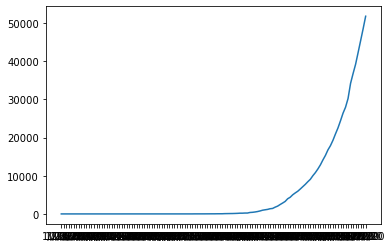

In [8]:
plt.plot(df_india)

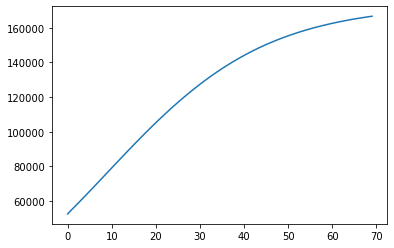

In [9]:
plt.plot(df_india_predict)